# Experiments and tests

In [1]:
from GeneticPGCSOptimizer import GeneticPGCSOptimizer
import matplotlib.pyplot as plt
from utils import *

source_f = "lilou1_hua.txt"
eval_f = "lilou1_hua.txt"

#New genetic optimizer
genetic_optimizer = GeneticPGCSOptimizer(source_f,eval_f,pop_size = 200,gen_number = 500,select_number = 64,
                                         randomizer = True, cross_proba = 0.5, cross_info_rate = 0.5,
                                         mutation_proba = 0.5, cost_average = False, distance_formula = "euclidean")

#Starting the genetic algorithm of our optimizer
optimal_grid = genetic_optimizer.genetic_algorithm()

####### Genetic Pictogram Grid Communication Optimizer ######

## Optimizer Parameters ##
Source file : lilou1_hua.txt     Evaluation file : lilou1_hua.txt

  INITIAL POPULATION SIZE : 200

  NUMBER OF GENERATION : 500

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

  DISTANCE FORMULA (COST) : EUCLIDEAN




** Optimization **:   0%|                                                              | 0/500 [00:00<?, ?generation/s]

INITIAL GENERATION (0) --> Best fitness : 8182.327206324266



** Optimization **: 100%|████████████████████████████████████████████████████| 500/500 [13:29<00:00,  1.62s/generation]

Best individual --> Generation : 464, Fitness : 5192.670807207054


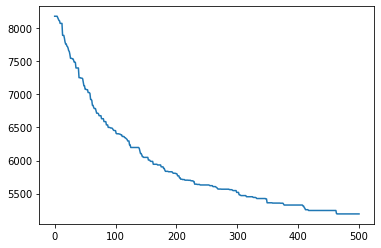

In [2]:
#We get the fitness history (saved during the execution)
history  = genetic_optimizer.fitness_history(option="only_best")

#Display the grid in one image (stored as "default.png")
optimal_grid.display()

#Plot the history
plt.plot(history)
plt.show()